# demo(graphics)

In [1]:
#  Copyright (C) 1997-2009 The R Core Team

require(datasets)
require(grDevices); require(graphics)

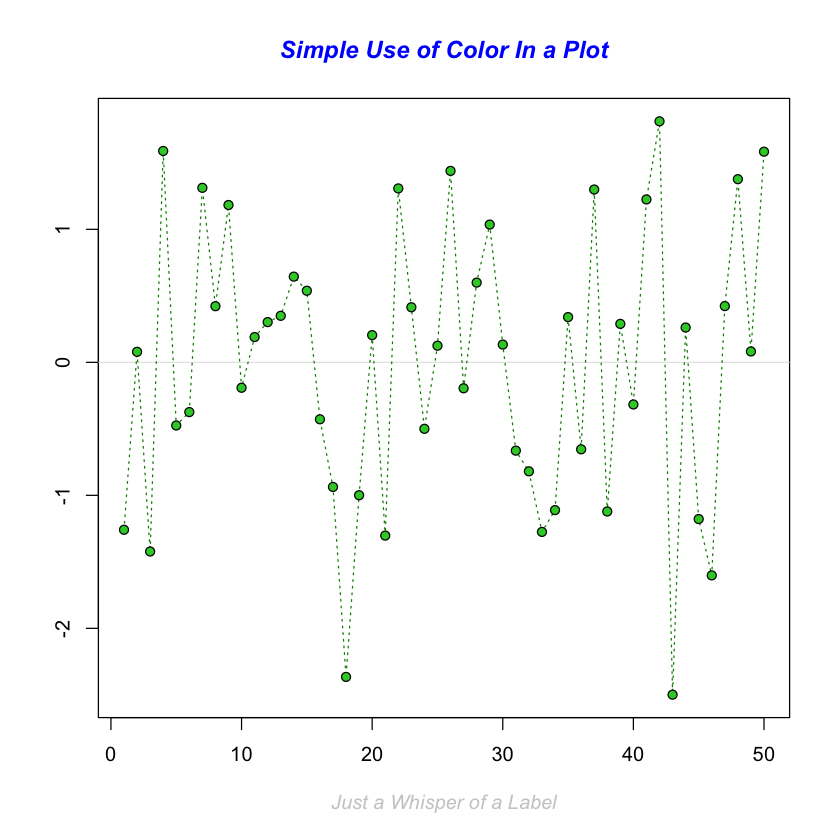

In [2]:
## Here is some code which illustrates some of the differences between
## R and S graphics capabilities.  Note that colors are generally specified
## by a character string name (taken from the X11 rgb.txt file) and that line
## textures are given similarly.  The parameter "bg" sets the background
## parameter for the plot and there is also an "fg" parameter which sets
## the foreground color.


x <- stats::rnorm(50)
opar <- par(bg = "white")
plot(x, ann = FALSE, type = "n")
abline(h = 0, col = gray(.90))
lines(x, col = "green4", lty = "dotted")
points(x, bg = "limegreen", pch = 21)
title(main = "Simple Use of Color In a Plot",
      xlab = "Just a Whisper of a Label",
      col.main = "blue", col.lab = gray(.8),
      cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

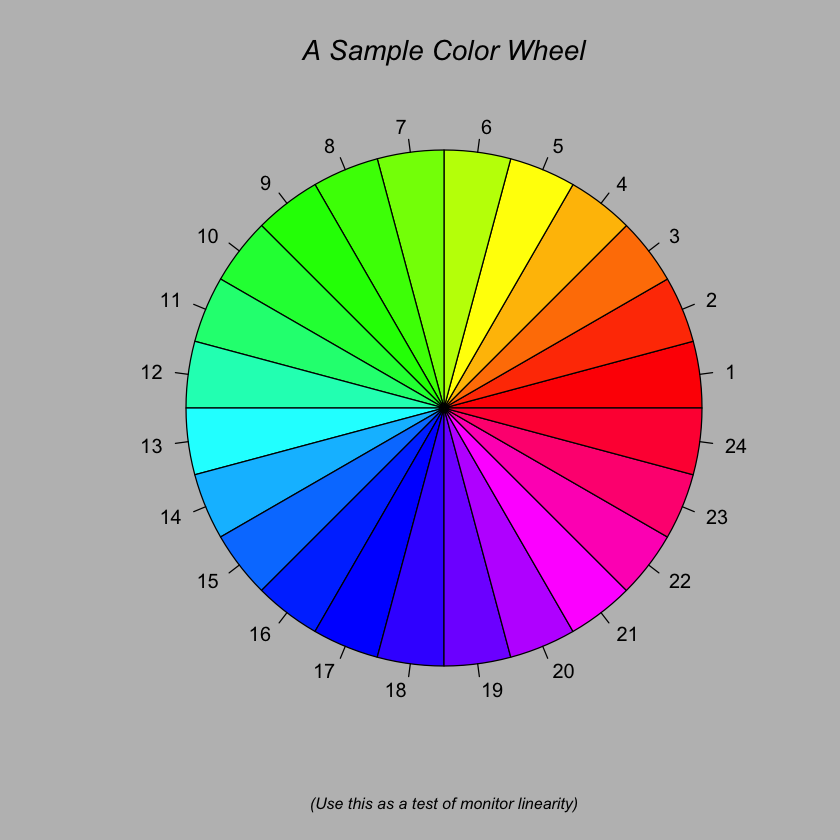

In [3]:
## A little color wheel.	 This code just plots equally spaced hues in
## a pie chart.	If you have a cheap SVGA monitor (like me) you will
## probably find that numerically equispaced does not mean visually
## equispaced.  On my display at home, these colors tend to cluster at
## the RGB primaries.  On the other hand on the SGI Indy at work the
## effect is near perfect.

par(bg = "gray")
pie(rep(1,24), col = rainbow(24), radius = 0.9)
title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3)
title(xlab = "(Use this as a test of monitor linearity)",
      cex.lab = 0.8, font.lab = 3)

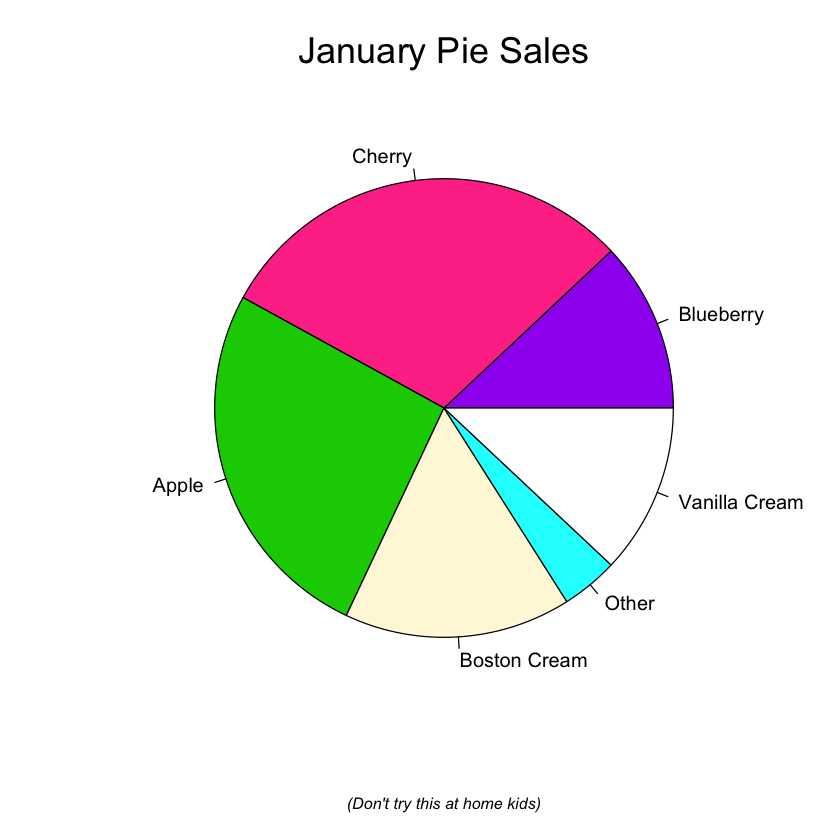

In [4]:
## We have already confessed to having these.  This is just showing off X11
## color names (and the example (from the postscript manual) is pretty "cute".

pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)
names(pie.sales) <- c("Blueberry", "Cherry",
		      "Apple", "Boston Cream", "Other", "Vanilla Cream")
pie(pie.sales,
    col = c("purple","violetred1","green3","cornsilk","cyan","white"))
title(main = "January Pie Sales", cex.main = 1.8, font.main = 1)
title(xlab = "(Don't try this at home kids)", cex.lab = 0.8, font.lab = 3)

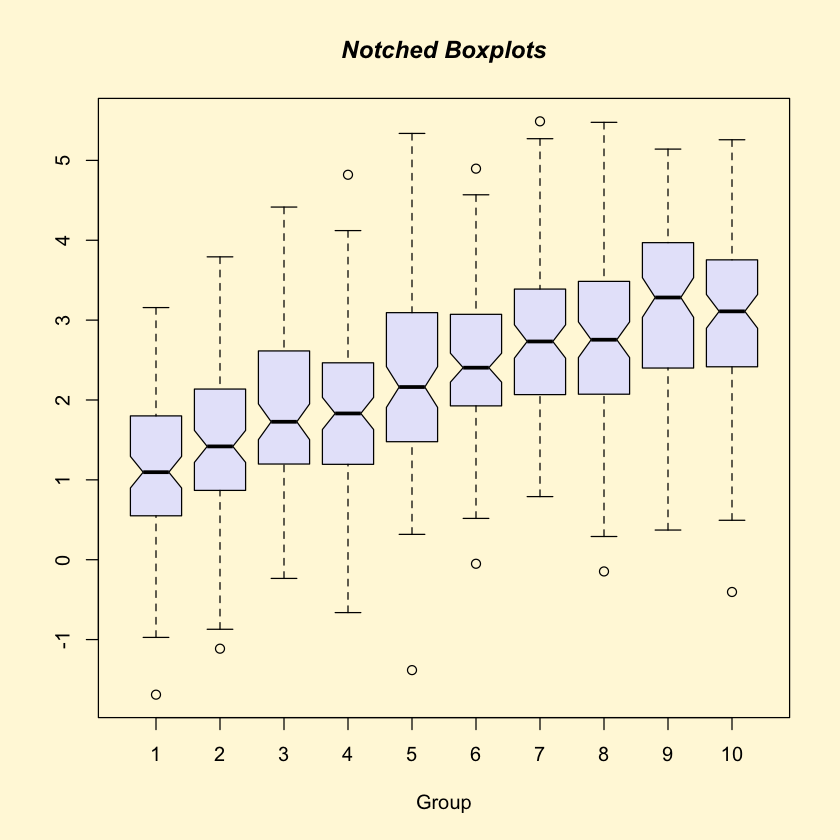

In [5]:
## Boxplots:  I couldn't resist the capability for filling the "box".
## The use of color seems like a useful addition, it focuses attention
## on the central bulk of the data.

par(bg="cornsilk")
n <- 10
g <- gl(n, 100, n*100)
x <- rnorm(n*100) + sqrt(as.numeric(g))
boxplot(split(x,g), col="lavender", notch=TRUE)
title(main="Notched Boxplots", xlab="Group", font.main=4, font.lab=1)

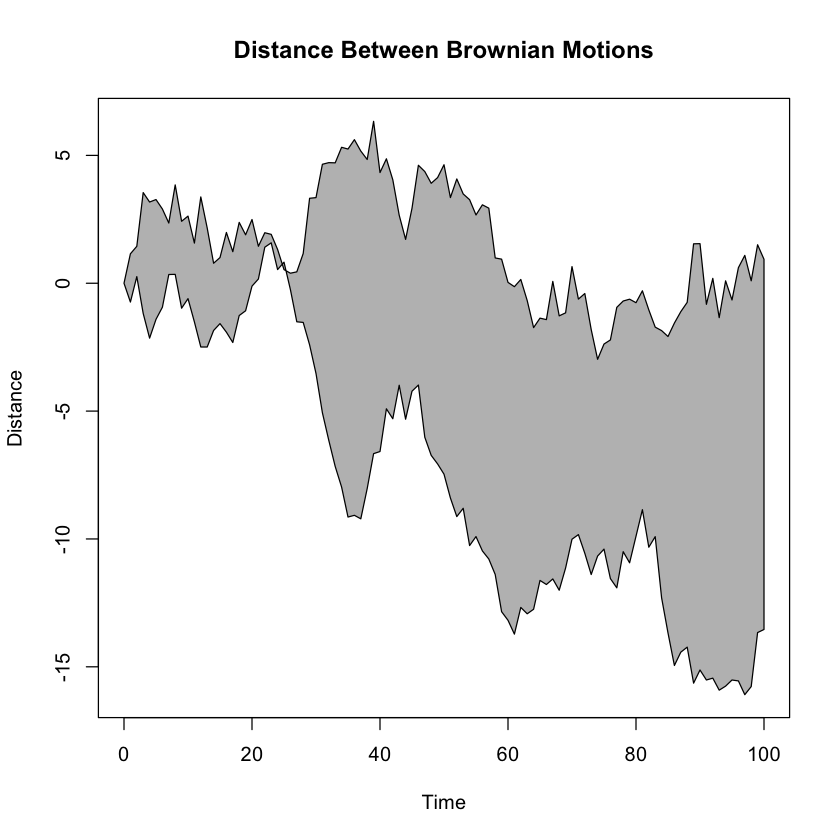

In [6]:
## An example showing how to fill between curves.

par(bg="white")
n <- 100
x <- c(0,cumsum(rnorm(n)))
y <- c(0,cumsum(rnorm(n)))
xx <- c(0:n, n:0)
yy <- c(x, rev(y))
plot(xx, yy, type="n", xlab="Time", ylab="Distance")
polygon(xx, yy, col="gray")
title("Distance Between Brownian Motions")

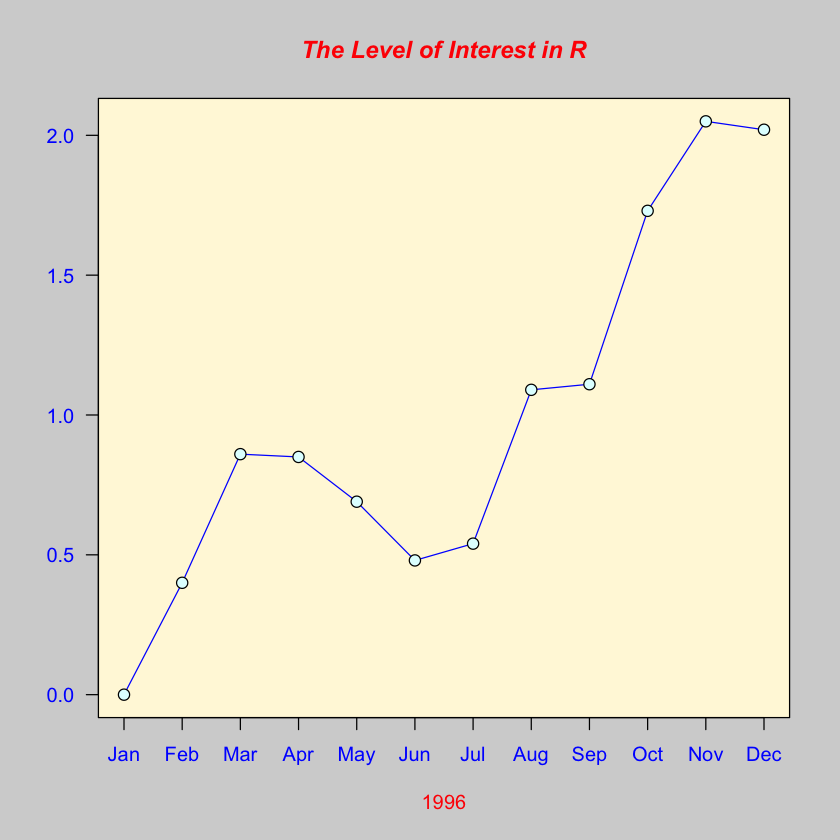

In [7]:
## Colored plot margins, axis labels and titles.	 You do need to be
## careful with these kinds of effects.	It's easy to go completely
## over the top and you can end up with your lunch all over the keyboard.
## On the other hand, my market research clients love it.

x <- c(0.00, 0.40, 0.86, 0.85, 0.69, 0.48, 0.54, 1.09, 1.11, 1.73, 2.05, 2.02)
par(bg="lightgray")
plot(x, type="n", axes=FALSE, ann=FALSE)
usr <- par("usr")
rect(usr[1], usr[3], usr[2], usr[4], col="cornsilk", border="black")
lines(x, col="blue")
points(x, pch=21, bg="lightcyan", cex=1.25)
axis(2, col.axis="blue", las=1)
axis(1, at=1:12, lab=month.abb, col.axis="blue")
box()
title(main= "The Level of Interest in R", font.main=4, col.main="red")
title(xlab= "1996", col.lab="red")

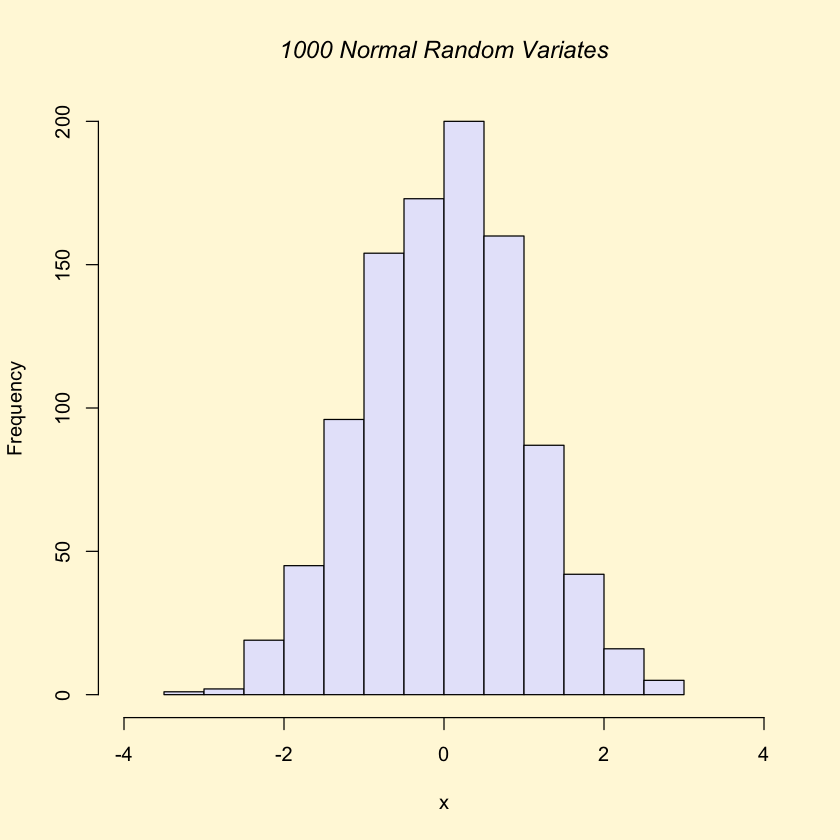

In [8]:
## A filled histogram, showing how to change the font used for the
## main title without changing the other annotation.

par(bg="cornsilk")
x <- rnorm(1000)
hist(x, xlim=range(-4, 4, x), col="lavender", main="")
title(main="1000 Normal Random Variates", font.main=3)

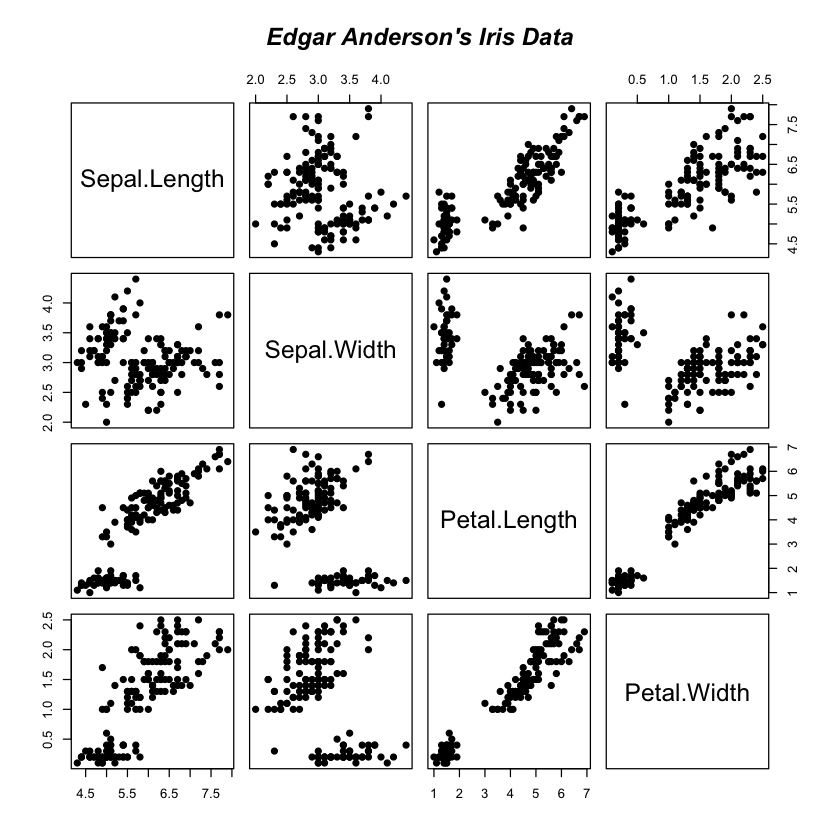

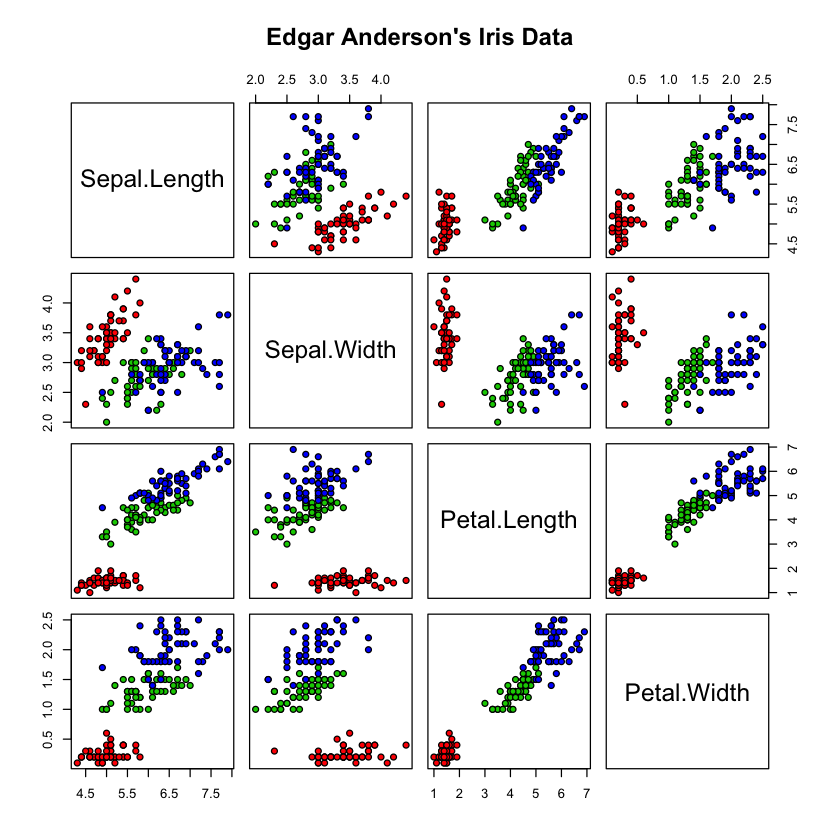

In [9]:
## A scatterplot matrix
## The good old Iris data (yet again)

pairs(iris[1:4], main="Edgar Anderson's Iris Data", font.main=4, pch=19)
pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
      bg = c("red", "green3", "blue")[unclass(iris$Species)])

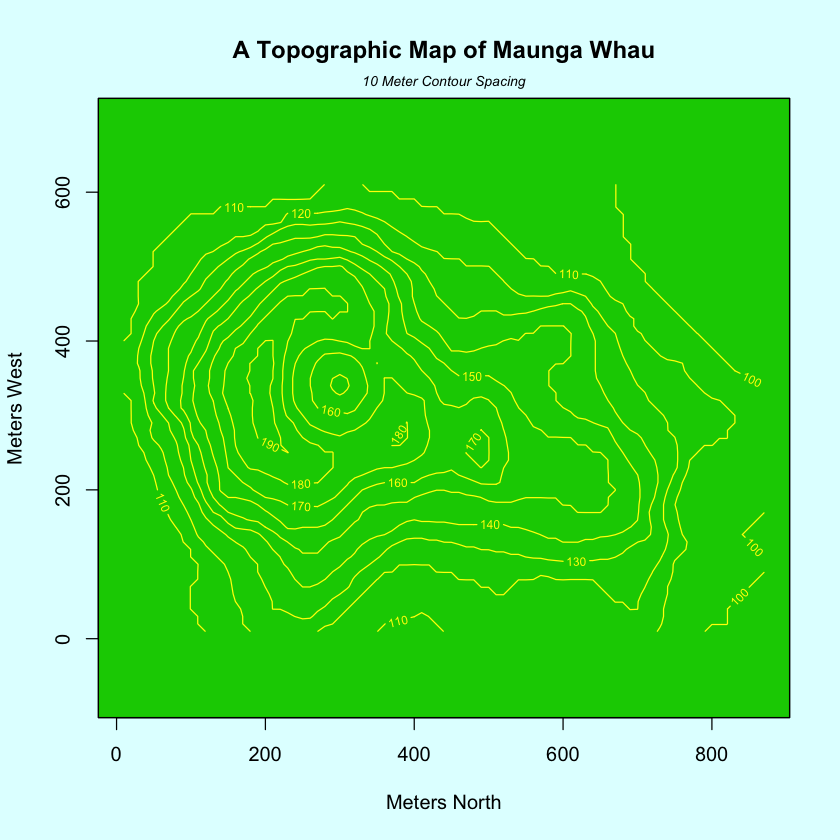

In [10]:
## Contour plotting
## This produces a topographic map of one of Auckland's many volcanic "peaks".

x <- 10*1:nrow(volcano)
y <- 10*1:ncol(volcano)
lev <- pretty(range(volcano), 10)
par(bg = "lightcyan")
pin <- par("pin")
xdelta <- diff(range(x))
ydelta <- diff(range(y))
xscale <- pin[1]/xdelta
yscale <- pin[2]/ydelta
scale <- min(xscale, yscale)
xadd <- 0.5*(pin[1]/scale - xdelta)
yadd <- 0.5*(pin[2]/scale - ydelta)
plot(numeric(0), numeric(0),
     xlim = range(x)+c(-1,1)*xadd, ylim = range(y)+c(-1,1)*yadd,
     type = "n", ann = FALSE)
usr <- par("usr")
rect(usr[1], usr[3], usr[2], usr[4], col="green3")
contour(x, y, volcano, levels = lev, col="yellow", lty="solid", add=TRUE)
box()
title("A Topographic Map of Maunga Whau", font= 4)
title(xlab = "Meters North", ylab = "Meters West", font= 3)
mtext("10 Meter Contour Spacing", side=3, line=0.35, outer=FALSE,
      at = mean(par("usr")[1:2]), cex=0.7, font=3)

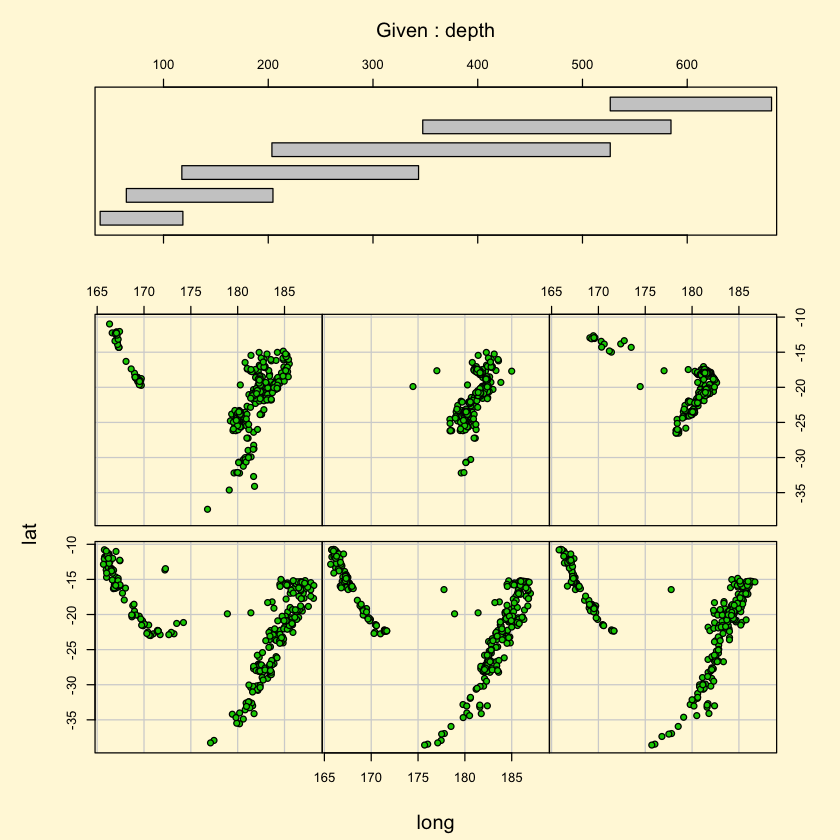

In [11]:
## Conditioning plots

par(bg="cornsilk")
coplot(lat ~ long | depth, data = quakes, pch = 21, bg = "green3")

par(opar)